# Description

Sees how well CNN_6_1_2 can predict if promoters from Thomasan's data are functional.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Helper functions for data preprocessing
def preprocess_sequences(X, max_length=150):
    return np.array([padded_one_hot_encode(seq.zfill(max_length)) for seq in X])

def padded_one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], '0': [0, 0, 0, 0]}
    return np.array([mapping[nucleotide.upper()] for nucleotide in sequence])

def reverse_complement(seq):
    complement = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
    return ''.join(complement[base.upper()] for base in reversed(seq))

In [3]:
model = keras.saving.load_model('../../Models/CNN_6_1_2.keras')

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [4]:
df = pd.read_csv('../../Data/Combined/LaFleur_supp.csv')[['Promoter Sequence', 'Observed log(TX/Txref)']]
df['Observed log(TX/Txref)'] = MinMaxScaler().fit_transform(df[['Observed log(TX/Txref)']].abs())
df.head()

,Promoter Sequence,Observed log(TX/Txref)
0,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATC...,0.248683
1,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATG...,0.249132
2,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATC...,0.271638
3,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATA...,0.292225
4,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATA...,0.189294


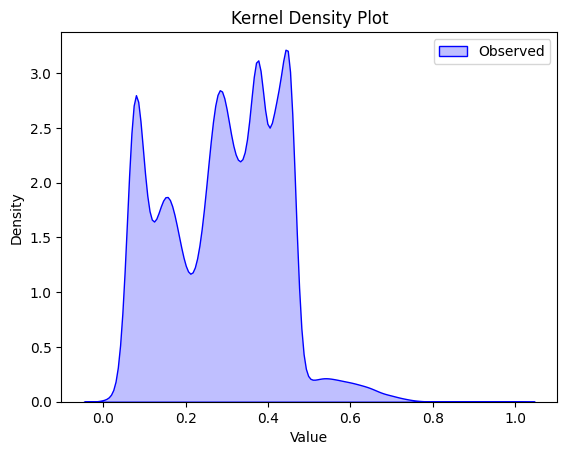

In [5]:
sns.kdeplot(df['Observed log(TX/Txref)'], fill=True, color='blue', label='Observed')
plt.title('Kernel Density Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


1524/1524 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


C:\Users\rsore\AppData\Local\Temp\ipykernel_10052\442071440.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


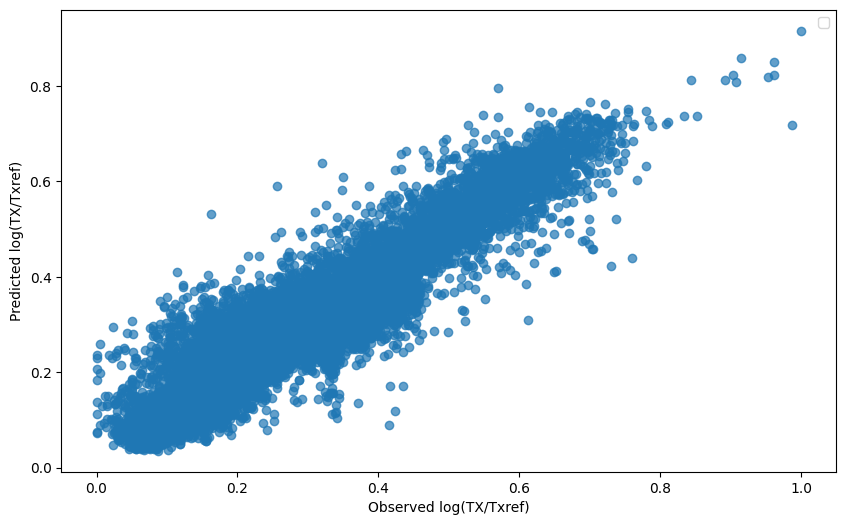

In [6]:
# Base data, no reversed sequences

x_test = df['Promoter Sequence']
pred = model.predict(preprocess_sequences(x_test)).flatten()

plt.figure(figsize=(10, 6))
plt.scatter(df['Observed log(TX/Txref)'], pred, alpha=0.7)
plt.xlabel('Observed log(TX/Txref)')
plt.ylabel('Predicted log(TX/Txref)')
plt.legend()
plt.show()

In [7]:
df = df[df['Observed log(TX/Txref)'] != 0]
df['Boolean Observed log(TX/Txref)'] = 1
df['Reversed Promoter Sequence'] = df['Promoter Sequence'].apply(reverse_complement)
df['Reversed Observed log(TX/Txref)'] = 0
df.head()

,Promoter Sequence,Observed log(TX/Txref),Boolean Observed log(TX/Txref),Reversed Promoter Sequence,Reversed Observed log(TX/Txref)
0,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATC...,0.248683,1,AACGTACAAACTAAGGTAGAGCCGCGGGGATTATAAGAGAAATAGG...,0
1,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATG...,0.249132,1,AACGTACAAACTAAGGTAGAGGCCGCCGCATTATAAGAGAAATAGG...,0
2,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATC...,0.271638,1,AACGTACAAACTAAGGTAGAGGCCCCCCGATTATAAGAGAAATAGG...,0
3,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATA...,0.292225,1,AACGTACAAACTAAGGTAGAGTACTTAATATTATAAGAGAAATAGG...,0
4,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATA...,0.189294,1,AACGTACAAACTAAGGTAGAGTGATTATTATTATAAGAGAAATAGG...,0


In [8]:
# Predicting expression for the normal and reversed sequences

promoter_squence = df['Promoter Sequence']
df['Predicted Expression'] = model.predict(preprocess_sequences(promoter_squence)).flatten()

reversed_promoter_squence = df['Reversed Promoter Sequence']
df['Reversed Predicted Expression'] = model.predict(preprocess_sequences(reversed_promoter_squence)).flatten()

1524/1524 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [11]:
df['Predicted Expression Change'] = df['Reversed Predicted Expression'] - df['Predicted Expression']
df['Absolute Predicted Expression Change'] = df['Predicted Expression Change'].abs()
df.head()

,Promoter Sequence,Observed log(TX/Txref),Boolean Observed log(TX/Txref),Reversed Promoter Sequence,Reversed Observed log(TX/Txref),Predicted Expression,Reversed Predicted Expression,Predicted Expression Change,Absolute Predicted Expression Change
0,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATC...,0.248683,1,AACGTACAAACTAAGGTAGAGCCGCGGGGATTATAAGAGAAATAGG...,0,0.331073,0.325113,-0.005959,0.005959
1,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATG...,0.249132,1,AACGTACAAACTAAGGTAGAGGCCGCCGCATTATAAGAGAAATAGG...,0,0.303946,0.361346,0.057401,0.057401
2,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATC...,0.271638,1,AACGTACAAACTAAGGTAGAGGCCCCCCGATTATAAGAGAAATAGG...,0,0.325465,0.321534,-0.003930,0.003930
3,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATA...,0.292225,1,AACGTACAAACTAAGGTAGAGTACTTAATATTATAAGAGAAATAGG...,0,0.321308,0.411851,0.090542,0.090542
4,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATA...,0.189294,1,AACGTACAAACTAAGGTAGAGTGATTATTATTATAAGAGAAATAGG...,0,0.367813,0.430548,0.062736,0.062736


C:\Users\rsore\AppData\Local\Temp\ipykernel_10052\548312638.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()


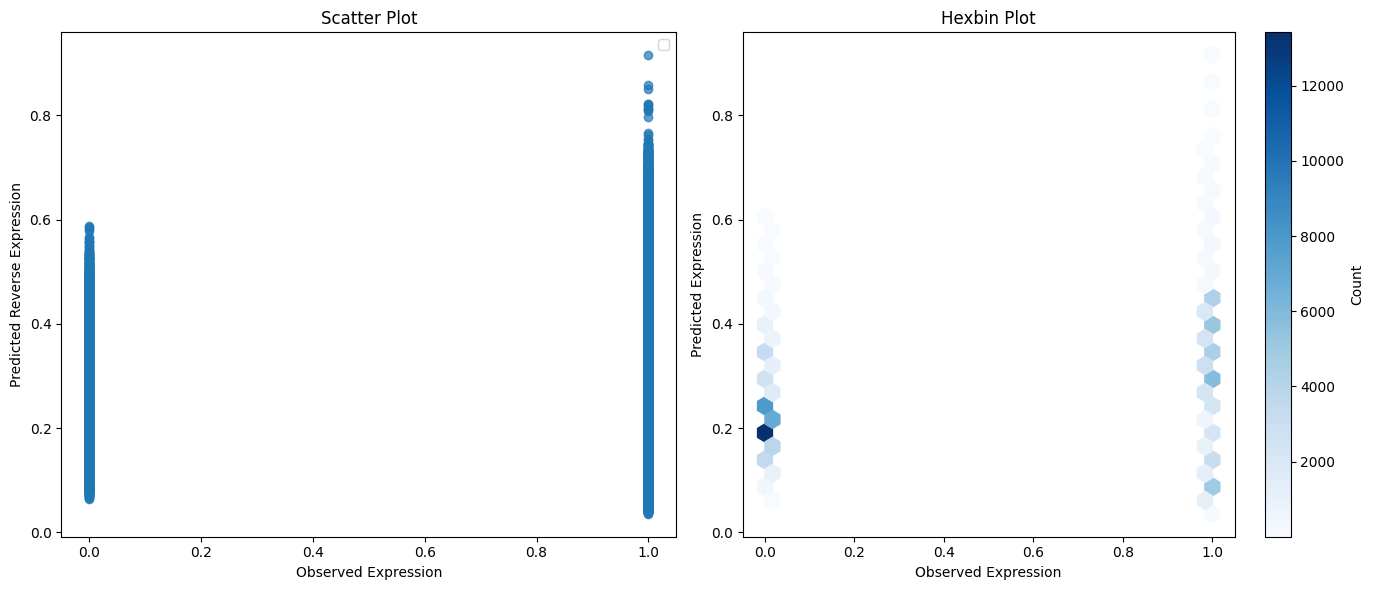

In [13]:
all_observed_bool = np.concatenate([df['Boolean Observed log(TX/Txref)'], df['Reversed Observed log(TX/Txref)']])
all_pred_expr = np.concatenate([df['Predicted Expression'], df['Reversed Predicted Expression']])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot
axes[0].scatter(all_observed_bool, all_pred_expr, alpha=0.7)
axes[0].set_xlabel('Observed Expression')
axes[0].set_ylabel('Predicted Reverse Expression')
axes[0].set_title('Scatter Plot')
axes[0].legend()

# Hexbin plot
hb = axes[1].hexbin(all_observed_bool, all_pred_expr, gridsize=30, cmap='Blues', mincnt=1)
fig.colorbar(hb, ax=axes[1], label='Count')
axes[1].set_xlabel('Observed Expression')
axes[1].set_ylabel('Predicted Expression')
axes[1].set_title('Hexbin Plot')

plt.tight_layout()
plt.show()


C:\Users\rsore\AppData\Local\Temp\ipykernel_10052\4110578336.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
C:\Users\rsore\AppData\Local\Temp\ipykernel_10052\4110578336.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


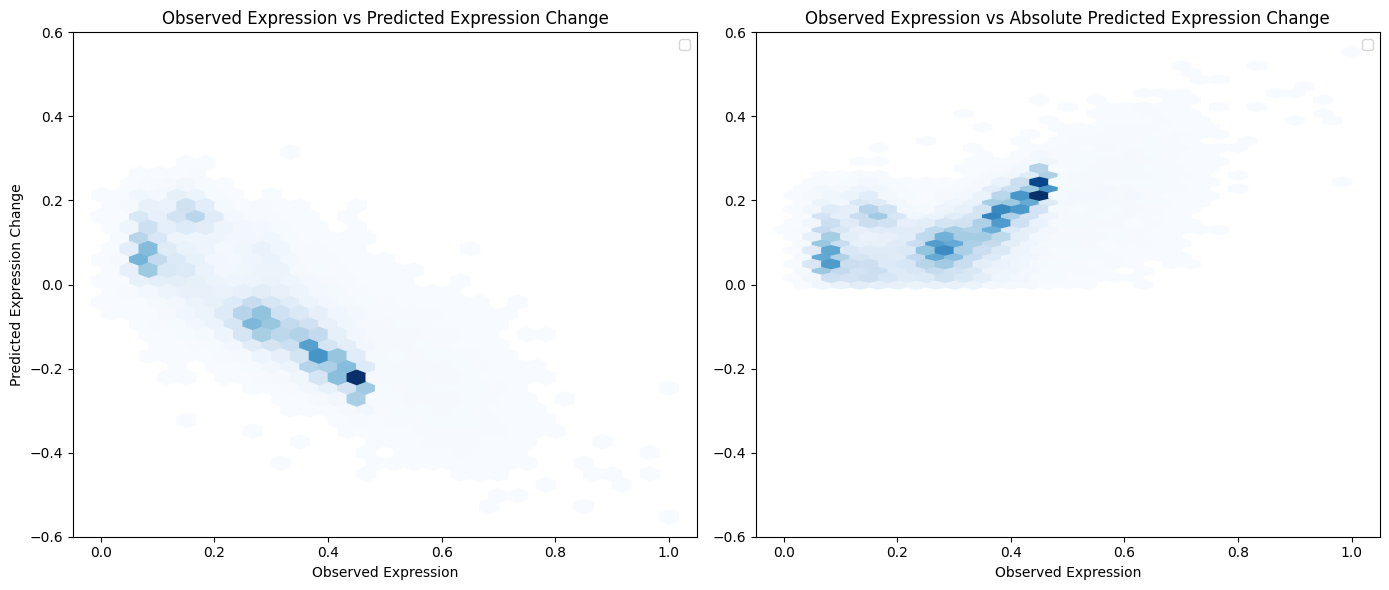

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


# Predicted Expression Change
hb = axes[0].hexbin(df['Observed log(TX/Txref)'], df['Predicted Expression Change'], gridsize=30, cmap='Blues', mincnt=1)
axes[0].set_xlabel('Observed Expression')
axes[0].set_ylabel('Predicted Expression Change')
axes[0].set_ylim(-0.6, 0.6)
axes[0].set_title('Observed Expression vs Predicted Expression Change')
axes[0].legend()

# Absolute Predicted Expression Change
hb = axes[1].hexbin(df['Observed log(TX/Txref)'], df['Absolute Predicted Expression Change'], gridsize=30, cmap='Blues', mincnt=1)
axes[1].set_xlabel('Observed Expression')
axes[1].set_ylim(-0.6, 0.6)
axes[1].set_title('Observed Expression vs Absolute Predicted Expression Change')
axes[1].legend()

plt.tight_layout()
plt.show()

C:\Users\rsore\AppData\Local\Temp\ipykernel_10052\3392519266.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
C:\Users\rsore\AppData\Local\Temp\ipykernel_10052\3392519266.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


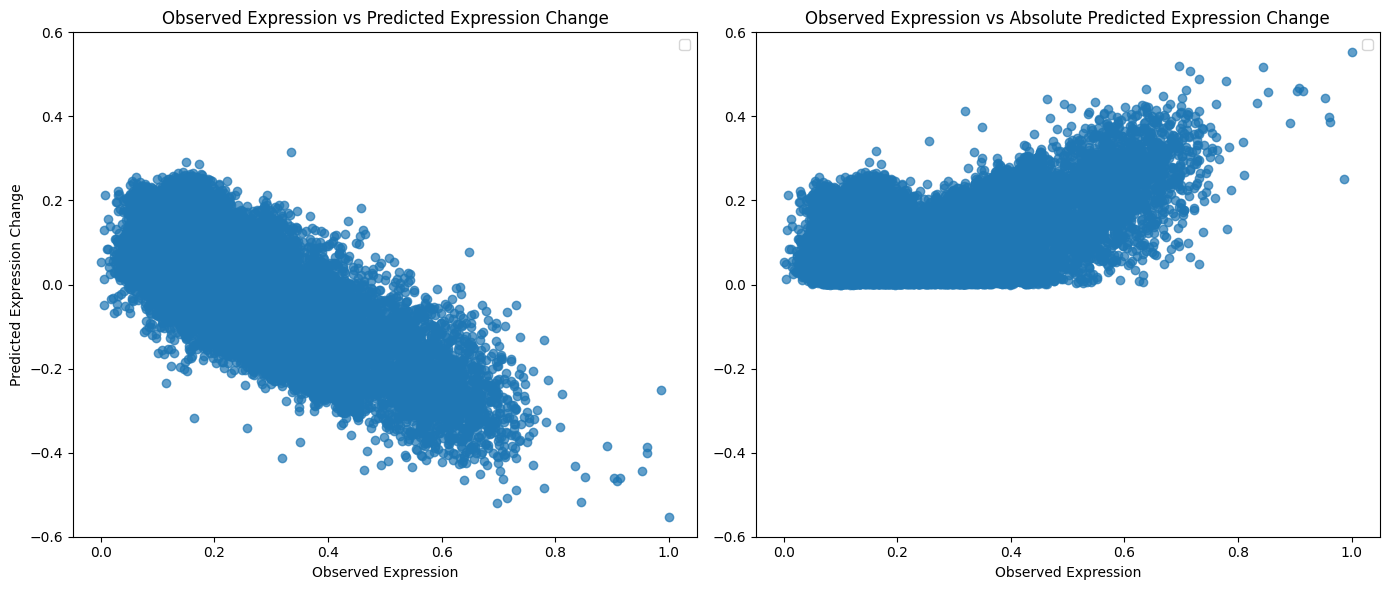

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Predicted Expression Change
axes[0].scatter(df['Observed log(TX/Txref)'], df['Predicted Expression Change'], alpha=0.7)
axes[0].set_xlabel('Observed Expression')
axes[0].set_ylabel('Predicted Expression Change')
axes[0].set_ylim(-0.6, 0.6)
axes[0].set_title('Observed Expression vs Predicted Expression Change')
axes[0].legend()

# Absolute Predicted Expression Change
axes[1].scatter(df['Observed log(TX/Txref)'], df['Absolute Predicted Expression Change'], alpha=0.7)
axes[1].set_xlabel('Observed Expression')
axes[1].set_ylim(-0.6, 0.6)
axes[1].set_title('Observed Expression vs Absolute Predicted Expression Change')
axes[1].legend()

plt.tight_layout()
plt.show()

In [32]:
df.head()

,Promoter Sequence,Observed log(TX/Txref),Boolean Observed log(TX/Txref),Reversed Promoter Sequence,Reversed Observed log(TX/Txref),Predicted Expression,Reversed Predicted Expression,Predicted Expression Change,Absolute Predicted Expression Change
0,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATC...,0.248683,1,AACGTACAAACTAAGGTAGAGCCGCGGGGATTATAAGAGAAATAGG...,0,0.331073,0.325113,-0.005959,0.005959
1,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATG...,0.249132,1,AACGTACAAACTAAGGTAGAGGCCGCCGCATTATAAGAGAAATAGG...,0,0.303946,0.361346,0.057401,0.057401
2,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATC...,0.271638,1,AACGTACAAACTAAGGTAGAGGCCCCCCGATTATAAGAGAAATAGG...,0,0.325465,0.321534,-0.003930,0.003930
3,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATA...,0.292225,1,AACGTACAAACTAAGGTAGAGTACTTAATATTATAAGAGAAATAGG...,0,0.321308,0.411851,0.090542,0.090542
4,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATA...,0.189294,1,AACGTACAAACTAAGGTAGAGTGATTATTATTATAAGAGAAATAGG...,0,0.367813,0.430548,0.062736,0.062736


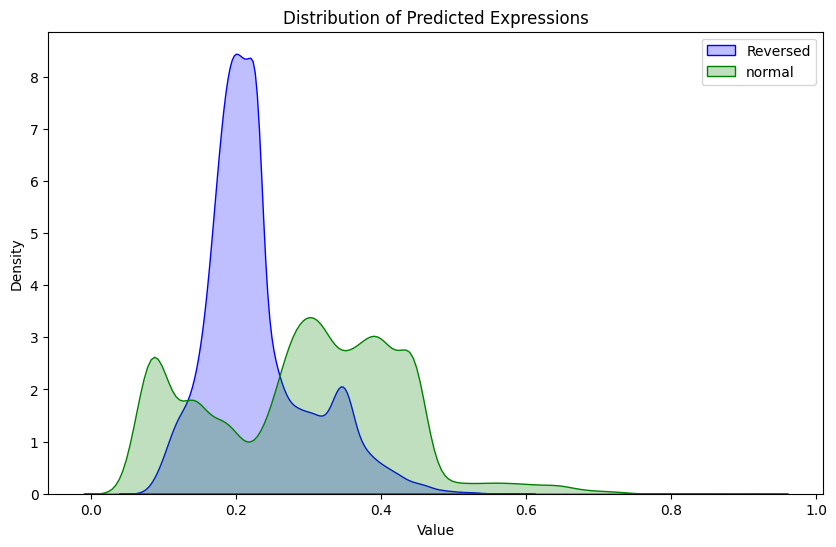

In [ ]:
fig = plt.figure(figsize=(10, 6))

sns.kdeplot(df['Reversed Predicted Expression'], fill=True, color='blue', label='Reversed')
sns.kdeplot(df['Predicted Expression'], fill=True, color='green', label='Normal')
plt.title('Distribution of Predicted Expressions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()
